## Sentiment Analysis

In [1]:
import pandas as pd
data = pd.read_pickle('corpus.pkl')
data = pd.DataFrame(data.reset_index())
data = data.drop(columns = ['index'])
data.head()

,transcript,full_name
0,"Madam Speaker, Vice President Biden, Members o...",Barack Obama2010
1,"Mr. Speaker, Mr. Vice President, members of Co...",Barack Obama2011
2,"Mr. Speaker, Mr. Vice President, members of C...",Barack Obama2012
3,"\r\nMr. Speaker, Mr. Vice President, members o...",Barack Obama2013
4,"Mr. Speaker, Mr. Vice President, Members of Co...",Barack Obama2014


In [2]:
import re
tuple_list = []
for i in data.full_name:
    res = re.findall(r'(\w+?)(\d+)', i)[0]
    tuple_list.append(res)
df = pd.DataFrame(tuple_list, columns =['name', 'year'])
df.head()

,name,year
0,Obama,2010
1,Obama,2011
2,Obama,2012
3,Obama,2013
4,Obama,2014


In [3]:
data = pd.merge(data,df,left_index=True, right_index=True)
data.head()

,transcript,full_name,name,year
0,"Madam Speaker, Vice President Biden, Members o...",Barack Obama2010,Obama,2010
1,"Mr. Speaker, Mr. Vice President, members of Co...",Barack Obama2011,Obama,2011
2,"Mr. Speaker, Mr. Vice President, members of C...",Barack Obama2012,Obama,2012
3,"\r\nMr. Speaker, Mr. Vice President, members o...",Barack Obama2013,Obama,2013
4,"Mr. Speaker, Mr. Vice President, Members of Co...",Barack Obama2014,Obama,2014


In [4]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data.head()

,transcript,full_name,name,year,polarity,subjectivity
0,"Madam Speaker, Vice President Biden, Members o...",Barack Obama2010,Obama,2010,0.083579,0.428497
1,"Mr. Speaker, Mr. Vice President, members of Co...",Barack Obama2011,Obama,2011,0.152374,0.418489
2,"Mr. Speaker, Mr. Vice President, members of C...",Barack Obama2012,Obama,2012,0.124897,0.409874
3,"\r\nMr. Speaker, Mr. Vice President, members o...",Barack Obama2013,Obama,2013,0.153017,0.435735
4,"Mr. Speaker, Mr. Vice President, Members of Co...",Barack Obama2014,Obama,2014,0.163599,0.430805


In [8]:
data2 = data.groupby('name').mean().reset_index()
data2.head()

,name,polarity,subjectivity
0,Bush,0.147867,0.457838
1,Carter,0.135782,0.444452
2,Clinton,0.147217,0.423168
3,Ford,0.138842,0.449193
4,Johnson,0.150420,0.443998


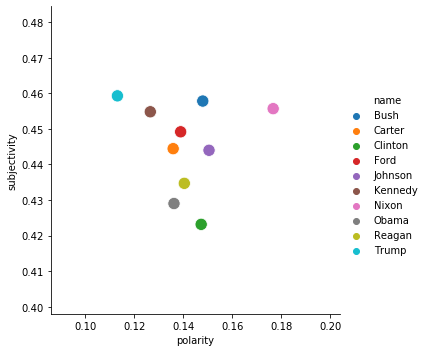

In [13]:
# Let's plot the results
import seaborn as sns
sns.relplot(x="polarity", y="subjectivity", hue="name",data=data2, s=150);

Polarity: measurement of positivity, -1 is very negative, +1 is very positive.

Subjectivity: measurement of subjectivity, 0 is very subjective, +1 is very opinionated.


## Sentiment Over Time

In [14]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [18]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

In [19]:
# The list has 10 elements, one for each transcript
len(list_pieces)

52

In [20]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [33]:
# Calculate the subjectivity for each piece of text
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)

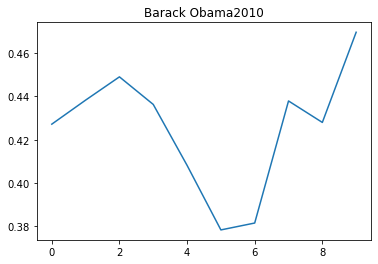

In [34]:
# Show the plot for one president
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(subjectivity_transcript[0])
plt.title(data['full_name'][0])
plt.show()

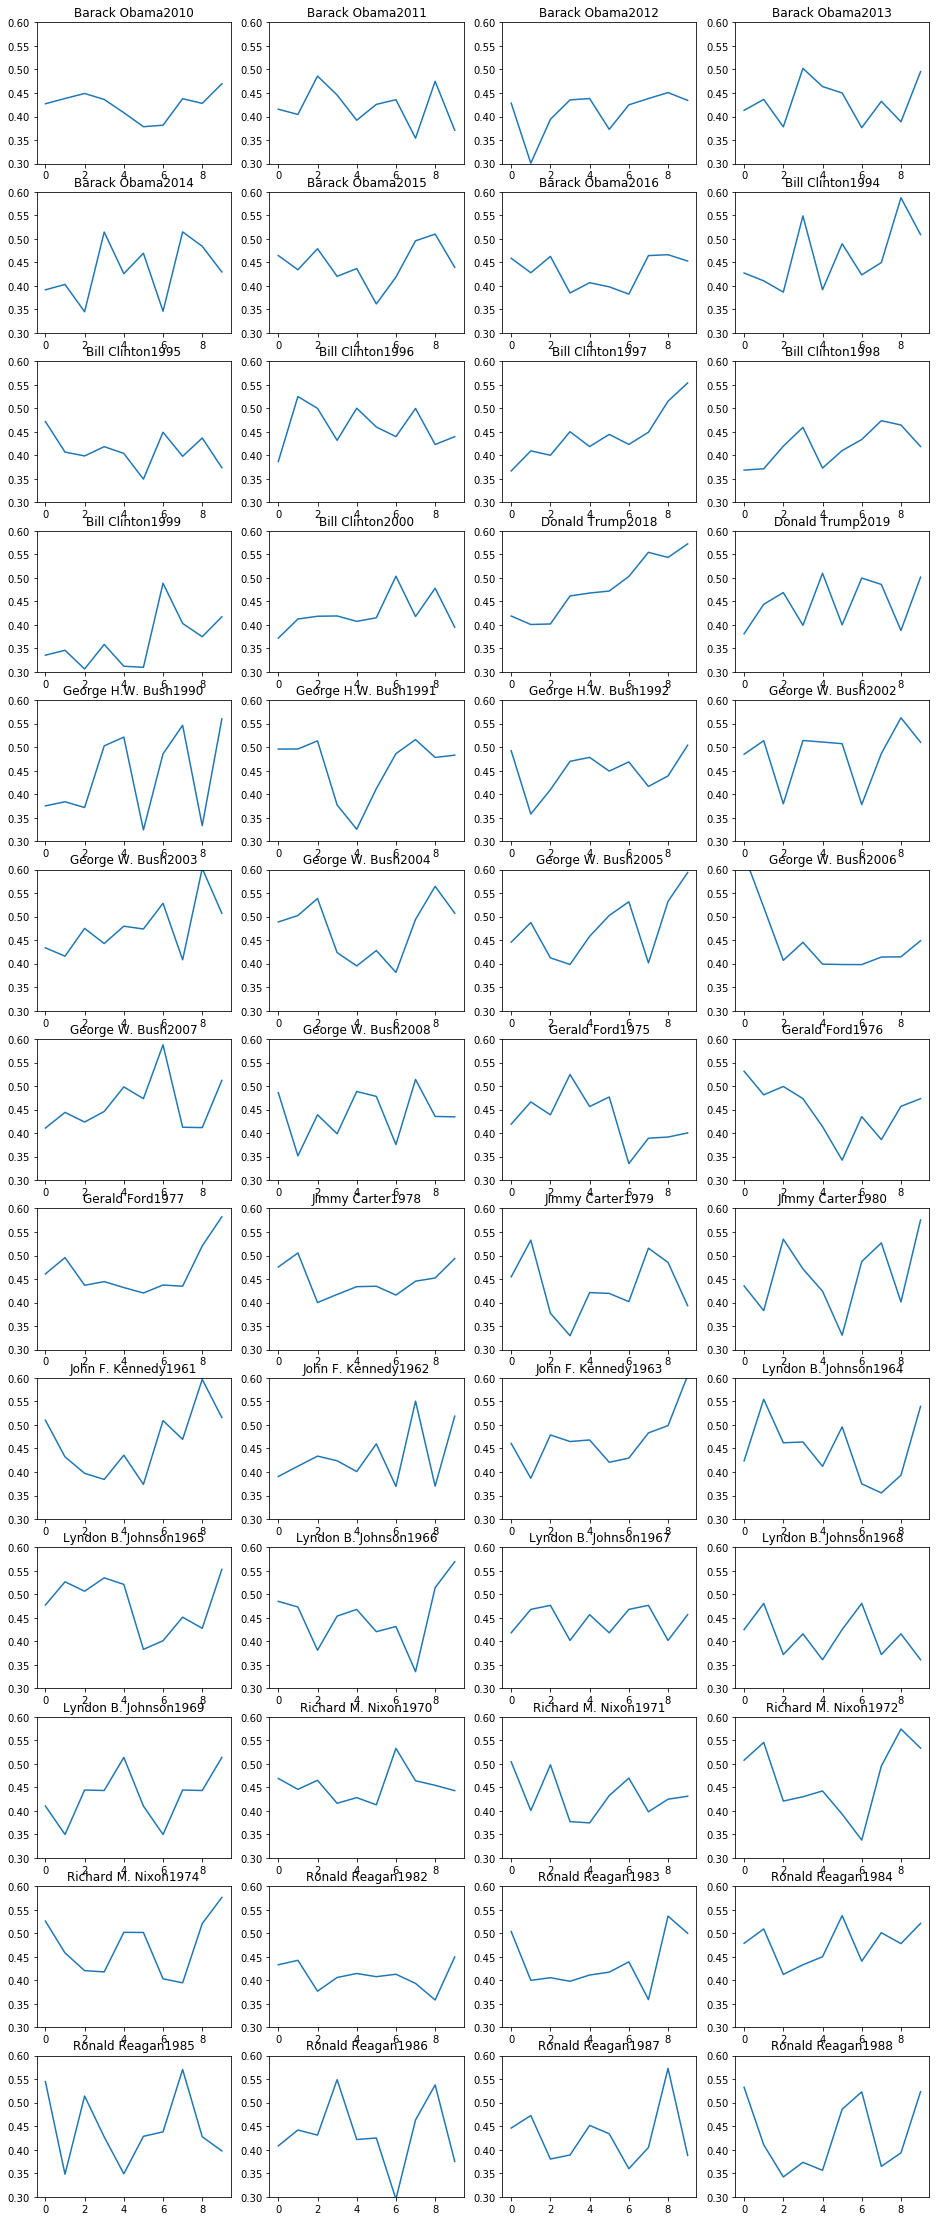

In [35]:
# Show the plot for all presidents
plt.rcParams['figure.figsize'] = [16, 40]

for index, president in enumerate(data.index):    
    plt.subplot(13, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=0.3, ymax=0.6)
    
plt.show()

In [36]:
# Calculate the polarity for each piece of text
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

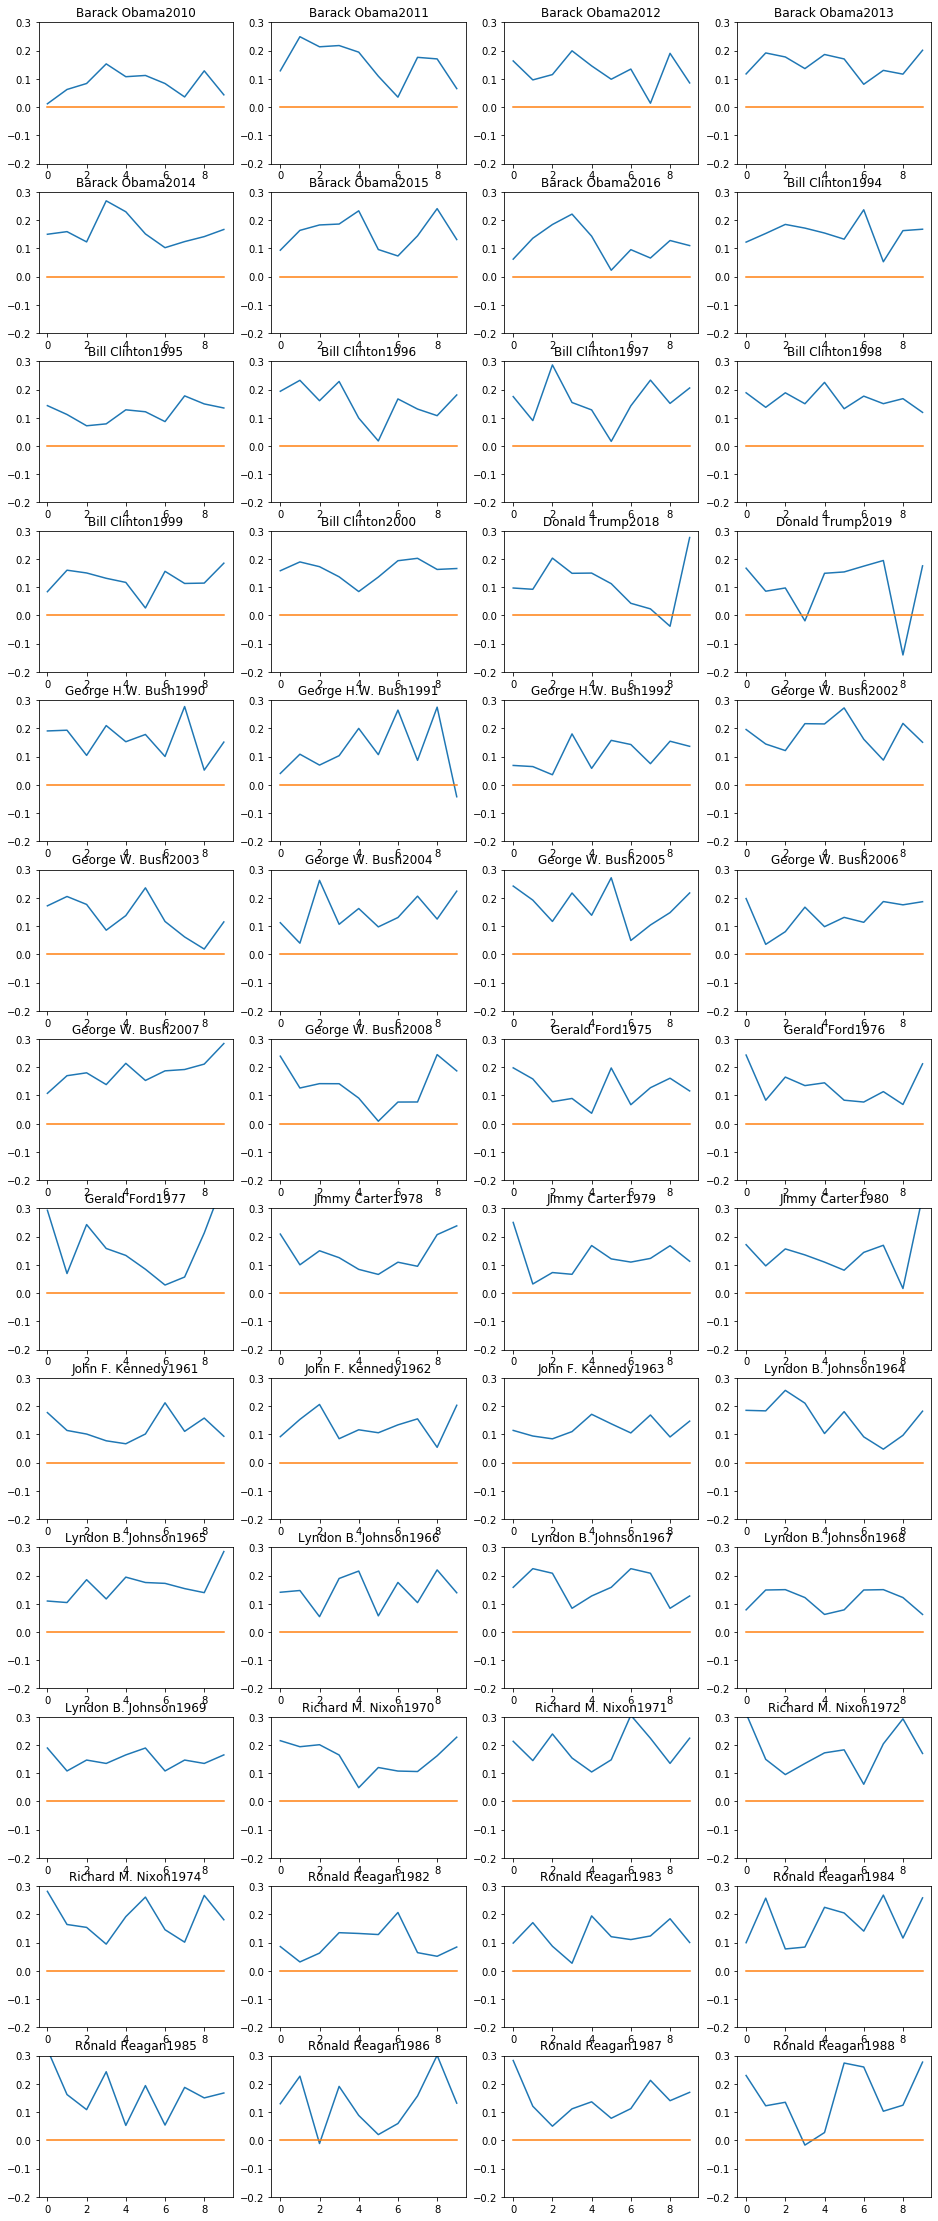

In [42]:
# Show the plot for all presidents
plt.rcParams['figure.figsize'] = [16, 40]

for index, president in enumerate(data.index):    
    plt.subplot(13, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-0.2, ymax=0.3)
    
plt.show()